This image is :  <class 'numpy.ndarray'> with dimensions: (720, 1280, 3)


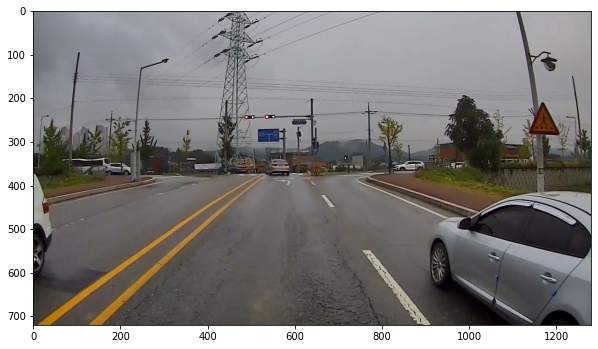

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
%matplotlib inline

img = mpimg.imread('123.jpg')

plt.figure(figsize=(10,8))
print('This image is : ', type(img), 'with dimensions:', img.shape)

plt.imshow(img)
plt.show()

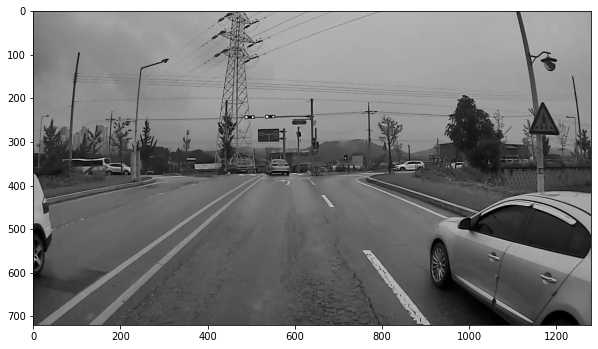

In [2]:
#gray Scale
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

gray = grayscale(img)
plt.figure(figsize = (10, 8))
plt.imshow(gray, cmap='gray')
plt.show()

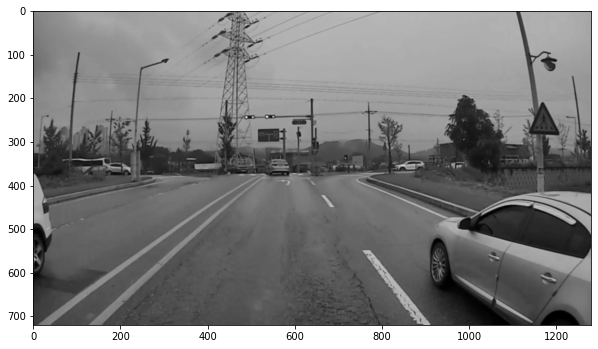

In [3]:
#가우시안: 블러처리
def gaussian_blur(img, kernel_size):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

kernel_size = 5
blur_gray = gaussian_blur(gray, kernel_size)

plt.figure(figsize=(10,8))
plt.imshow(blur_gray, cmap='gray')
plt.show()

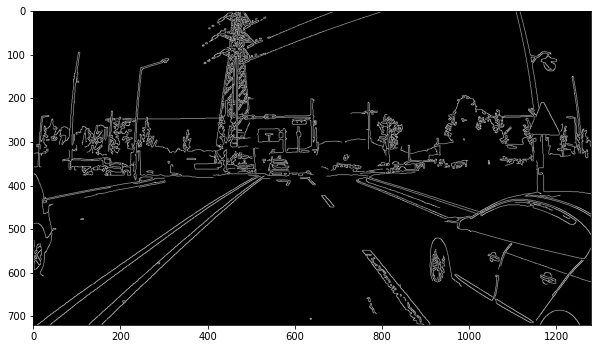

In [4]:
#학습모델: canny edge detection, 차선
def canny(img, low_threshold, high_threshold):
    return cv2.Canny(img, low_threshold, high_threshold)

low_threshold = 50
high_threshold = 200
edges = canny(blur_gray,low_threshold, high_threshold)

plt.figure(figsize=(10,8))
plt.imshow(edges, cmap='gray')
plt.show()

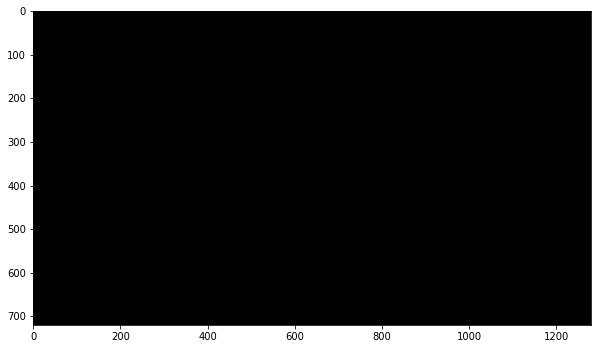

In [6]:
#차선 구분
#관심 영역 설정
#사진과 같은 크기설정
import numpy as np

mask = np.zeros_like(img)

plt.figure(figsize=(10,8))
plt.imshow(mask, cmap='gray')
plt.show()

In [7]:
if len(img.shape) >2:
    channel_count = img.shape[2] #채널수
    ignore_mask_color = (255,) * channel_count
else:
    ignore_mask_color = 255
    
imshape = img.shape
print(imshape)



(720, 1280, 3)


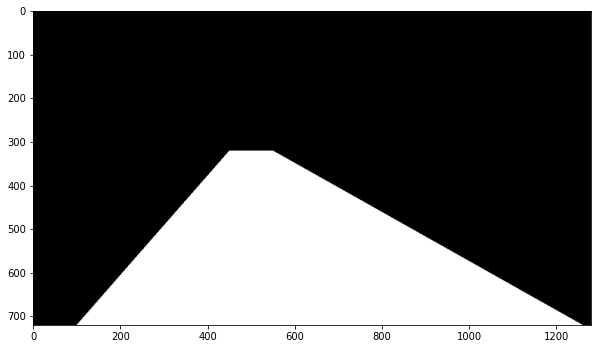

In [8]:
vertices = np.array([[(100, imshape[0]),
                     (450, 320),
                      (550, 320),
                      (imshape[1]-20, imshape[0])]], dtype=np.int32)

cv2.fillPoly(mask, vertices, ignore_mask_color) #채워진 다각형 도형 그리기(이미지, 좌표점, 색상)

plt.figure(figsize=(10, 8))
plt.imshow(mask, cmap='gray')

plt.show() #하얀부분 범위 설정


In [9]:
#하얀부분 범위 설정
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    
    if len(img.shape) > 2:
        channel_count = img.shape[2]
        ignore_mask_color = (255,) * channel_cout
    else:
        ignore_mask_color = 255
        
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    masked_image = cv2.bitwise_and(img, mask) #이미지 비트연산 , 배경을 지우거나 찾음, 원본에서 mask 부분 제거
    
    return masked_image

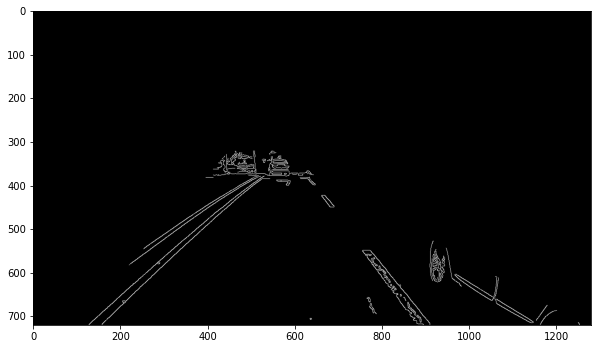

In [11]:
imshape = img.shape

vertives = np.array([[(100, imshape[0]),
                     (450, 320),
                      (550, 320),
                      (imshape[1]-20, imshape[0])
                     ]], dtype=np.int32)

mask = region_of_interest(edges, vertices)

plt.figure(figsize=(10,8))
plt.imshow(mask, cmap='gray')
plt.show()
                
                        

In [18]:
#이미지에서 선형 도형 검출(Hough Line Transform)
def draw_lines(img, lines, color=[255, 0, 0], thickness=5):
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(img, (x1, y1), (x2,y2), color, thickness)
            
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

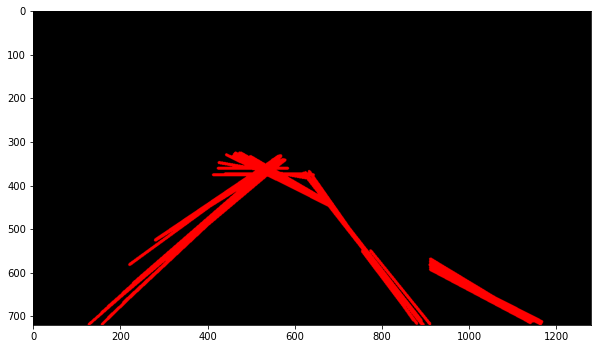

In [19]:
rho = 2
theta = np.pi/180
threshold = 90
min_line_len = 120
max_line_gap = 150

lines = hough_lines(mask, rho, theta, threshold, min_line_len, max_line_gap)

plt.figure(figsize=(10,8))
plt.imshow(lines, cmap='gray')
plt.show()

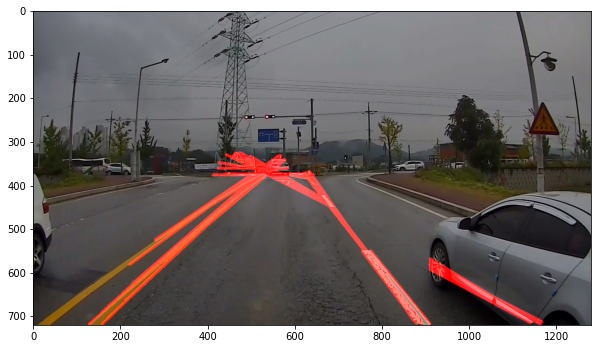

In [21]:
#원본 사진에 line 추가
def weighted_img(img, initial_img, α=0.8, β=1, γ=0.):
    return cv2.addWeighted(initial_img,  α, img, β, γ)

line_edges = weighted_img(lines, img, α=0.8, β=1, γ=0. )
plt.figure(figsize=(10,8))
plt.imshow(line_edges)
plt.show()